In [1]:
import collections
import csv
import itertools
import json
import datetime
import random
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import seaborn as sns
import tqdm

In [2]:
geo_data = {}
with open("2023_data_geolocated_only.csv") as csv_file:
    reader = csv.DictReader(csv_file)
    missing_field_count = 0
    for row in reader:
        if not row.get("user_id") or not row.get("country"):
            missing_field_count += 1
            continue
        geo_data[row["user_id"]] = row["country"]
    print(f"Had {missing_field_count} rows with missing fields")


Had 0 rows with missing fields


In [3]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

In [52]:
LIMIT = 10

country_count_post = collections.defaultdict(int)
country_count_libs = collections.defaultdict(int)
country_count_pairs = collections.defaultdict(int)

for language in LANGUAGES:
    print(f"Processing {language}")
    path_to_lib = f"data/results/{language}"

    with open(f"{path_to_lib}/{language}_libs_count.json") as handle:
        libs_count = json.load(handle)

    with open(f"{path_to_lib}/{language}_{language}_post_stats.json") as handle:
        lib_data = json.load(handle)
        print(f"We have {len(lib_data)} total posts")

    lib_have_seen = set()
    pair_have_seen = set()
    stats = collections.defaultdict(int)
    for data_item in tqdm.tqdm(lib_data):
        poster_id = data_item.get("poster_id")
        if not poster_id:
            stats["no poster id"] += 1
            continue
    
        country = geo_data.get(poster_id)
        if not country:
            stats["no country"] += 1
            continue

        country_count_post[country] += 1
        
        relevant_imports = [imp for imp in data_item.get("imports", []) if libs_count.get(imp, 0) > LIMIT]

        if not relevant_imports:
            stats["irrelevant post"] += 1
            continue

        if all(imp in lib_have_seen for imp in relevant_imports):
            stats["no novel lib"] += 1
        else:
            # NOVELTY FOUND, LET US DOCUMENT THE COUNTRY (ONLY ONCE PER POST!)
            country_count_libs[country] += 1
        
        for lib in relevant_imports:
            lib_have_seen.add(lib)
        stats["lib success"] += 1

        if all(pair in pair_have_seen for pair in itertools.combinations(relevant_imports, 2)):
            stats["no novel pair"] += 1
        else:
            # NOVELTY FOUND, LET US DOCUMENT THE COUNTRY (ONLY ONCE PER POST!)
            country_count_pairs[country] += 1

        for pair in itertools.combinations(relevant_imports, 2):
            pair_have_seen.add(pair)
        stats["pairs success"] += 1

    print(stats)


Processing python
We have 1358392 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:03<00:00, 371436.55it/s]


defaultdict(<class 'int'>, {'lib success': 681655, 'pairs success': 681655, 'irrelevant post': 13013, 'no novel pair': 642953, 'no novel lib': 677531, 'no country': 663724})
Processing r
We have 327074 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:00<00:00, 417867.90it/s]


defaultdict(<class 'int'>, {'lib success': 161833, 'pairs success': 161833, 'no country': 161971, 'no novel pair': 151367, 'no novel lib': 160246, 'irrelevant post': 3270})
Processing javascript
We have 233986 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:00<00:00, 340378.09it/s]


defaultdict(<class 'int'>, {'lib success': 119006, 'pairs success': 119006, 'irrelevant post': 9121, 'no novel lib': 116902, 'no novel pair': 107351, 'no country': 105859})
Processing java
We have 315370 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:00<00:00, 429171.23it/s]


defaultdict(<class 'int'>, {'lib success': 147147, 'pairs success': 147147, 'no novel lib': 146848, 'no novel pair': 145858, 'no country': 167229, 'irrelevant post': 994})
Processing cpp
We have 54579 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 477786.56it/s]


defaultdict(<class 'int'>, {'lib success': 14391, 'pairs success': 14391, 'no country': 30740, 'no novel pair': 12810, 'irrelevant post': 9448, 'no novel lib': 13672})
Processing php
We have 114198 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 456688.34it/s]


defaultdict(<class 'int'>, {'lib success': 42854, 'no novel pair': 40543, 'pairs success': 42854, 'no novel lib': 41961, 'irrelevant post': 11396, 'no country': 59948})
Processing ruby
We have 37682 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 355810.06it/s]

defaultdict(<class 'int'>, {'no country': 13677, 'lib success': 21382, 'no novel pair': 19551, 'pairs success': 21382, 'irrelevant post': 2623, 'no novel lib': 21018})
Processing perl


We have 50826 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 293902.32it/s]

defaultdict(<class 'int'>, {'lib success': 30185, 'no novel pair': 27662, 'pairs success': 30185, 'no country': 20081, 'no novel lib': 29919, 'irrelevant post': 560})
Processing rust


We have 21836 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 369656.45it/s]


defaultdict(<class 'int'>, {'no country': 10095, 'lib success': 9496, 'no novel pair': 7332, 'pairs success': 9496, 'irrelevant post': 2245, 'no novel lib': 9073})
Processing swift
We have 52612 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 376829.06it/s]


defaultdict(<class 'int'>, {'no country': 25505, 'lib success': 26406, 'no novel pair': 25184, 'pairs success': 26406, 'no novel lib': 26150, 'irrelevant post': 701})
Processing objectivec
We have 15801 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 472119.15it/s]


defaultdict(<class 'int'>, {'irrelevant post': 4734, 'lib success': 3485, 'no novel pair': 3169, 'pairs success': 3485, 'no country': 7582, 'no novel lib': 3308})
Processing c#
We have 126252 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 394442.95it/s]

defaultdict(<class 'int'>, {'lib success': 65128, 'no novel pair': 63871, 'pairs success': 65128, 'no novel lib': 64730, 'no country': 59632, 'irrelevant post': 1492})


In [61]:
len(country_count_post), len(country_count_libs), len(country_count_pairs)

(237, 138, 188)

In [72]:
TOP_N = 50
HIT_CNT_THRESHOLD = 0
DIGITS = 5  # only for display

country_count_post_c = dict(collections.Counter(country_count_post).most_common(TOP_N))
country_count_libs_c = collections.Counter(country_count_libs)
country_count_pairs_c = collections.Counter(country_count_pairs)

libs_likelihoods = {
    country: (country_count_libs_c.get(country, 0) / country_count_post_c[country])
    for country, hits in country_count_post_c.items() if hits > HIT_CNT_THRESHOLD
}
sorted_libs_likelihoods = sorted(
    [(c, v) for c, v in libs_likelihoods.items() if v > 0],
    key=lambda x: x[1],
    reverse=True
)

pairs_likelihoods = {
    country: (country_count_pairs_c.get(country, 0) / country_count_post_c[country])
    for country, hits in country_count_post_c.items() if hits > HIT_CNT_THRESHOLD
}
sorted_pairs_likelihoods = sorted(
    [(c, v) for c, v in pairs_likelihoods.items() if v > 0],
    key=lambda x: x[1],
    reverse=True
)

print("countries in posts:", len(country_count_post_c))
print("nonzero libs (true):", len(sorted_libs_likelihoods))
print("nonzero pairs (true):", len(sorted_pairs_likelihoods))

countries in posts: 50
nonzero libs (true): 50
nonzero pairs (true): 50


# Plots

In [28]:
chrysler_blue = "#3123D0"
mellow_blue = "#448AEB"
ripe_red = "#DC0B0B"

In [29]:
def renamer(name):
    resp = {
        "Bosnia and Herzegovina": "Bosnia",
        "United Arab Emirates": "U.A.E.",
        "Türkiye": "Turkey",
    }.get(name)
    return resp or name

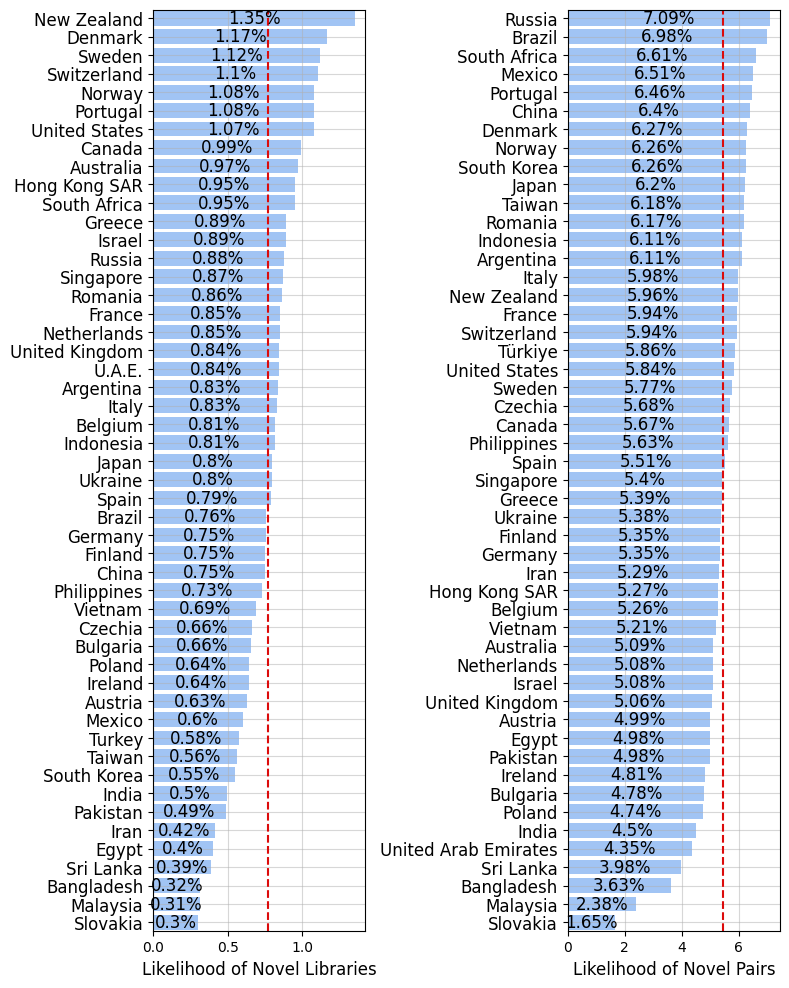

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 10), sharey=False)

categories, values = list(zip(*sorted_libs_likelihoods[::-1]))
categories = [renamer(category) for category in categories]
values = [100 * v for v in values]
avg_value = np.mean(values)

bars = ax1.barh(categories, values, color=mellow_blue, alpha=0.5)

ax1.set_xlabel('Likelihood of Novel Libraries', fontsize=12)
ax1.tick_params(axis='y', labelsize=12) 
for index, (bar, value) in enumerate(zip(bars, values)):
    x_position = bar.get_width() / 2
    ax1.text(
        x_position,            # X position (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
        f"{round(value, 2)}%",                     # Text (the value itself)
        ha='center',                    # Horizontal alignment
        va='center',                    # Vertical alignment
        color='black',                  # Text color
        fontsize=12,                     # Font size
    )
ax1.grid(alpha=0.5)
ax1.axvline(avg_value, linestyle="--", color=ripe_red)
ax1.margins(y=0.001)

categories, values = list(zip(*sorted_pairs_likelihoods[::-1]))
values = [100 * v for v in values]
avg_value = np.mean(values)

bars = ax2.barh(categories, values, color=mellow_blue, alpha=0.5)

ax2.set_xlabel('Likelihood of Novel Pairs', fontsize=12)
ax2.tick_params(axis='y', labelsize=12)

for index, (bar, value) in enumerate(zip(bars, values)):
    x_position = bar.get_width() / 2
    ax2.text(
        x_position,            # X position (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
         f"{round(value, 2)}%",               # Text (the value itself)
        ha='center',                    # Horizontal alignment
        va='center',                    # Vertical alignment
        color='black',                  # Text color
        fontsize=12,                     # Font size
    )
ax2.grid(alpha=0.5)
ax2.axvline(avg_value, linestyle="--", color=ripe_red)
ax2.margins(y=0.001)

plt.tight_layout()

plt.savefig(f"Likelihoods_top_N_{TOP_N}.png")

Data saved to countries_data.csv with date 2026-02-03
Saved 48 categories that appear in both plots


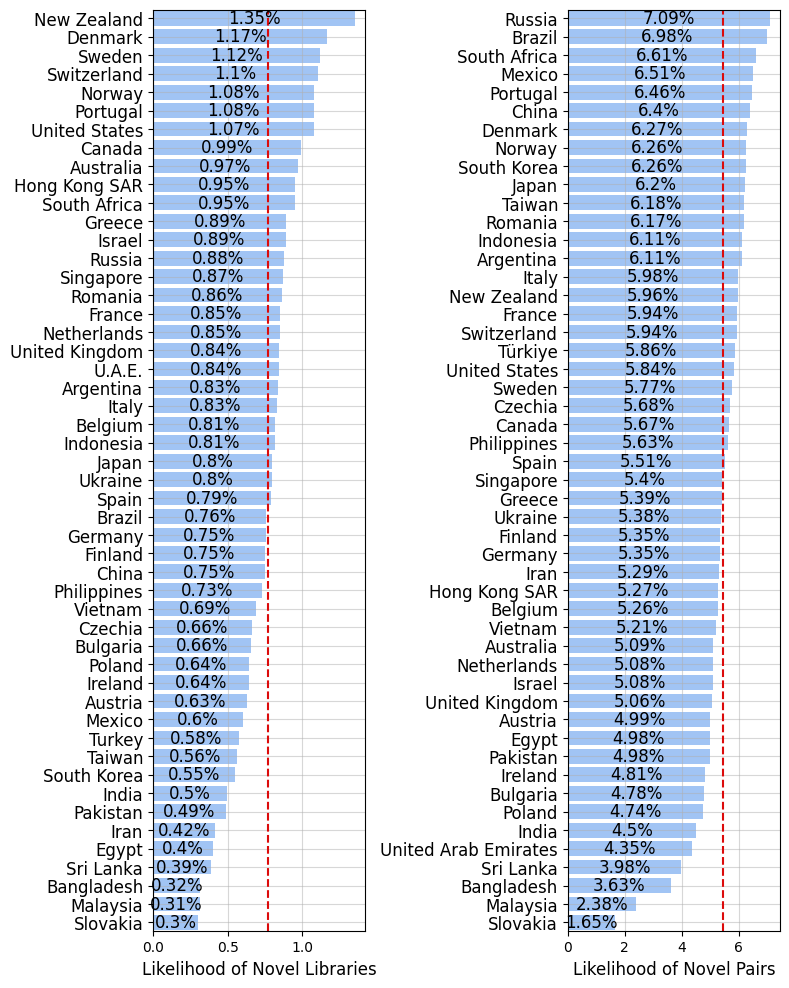

In [75]:
import csv
from datetime import datetime

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 10), sharey=False)
categories, values = list(zip(*sorted_libs_likelihoods[::-1]))
categories = [renamer(category) for category in categories]
values = [100 * v for v in values]
avg_value = np.mean(values)
bars = ax1.barh(categories, values, color=mellow_blue, alpha=0.5)
ax1.set_xlabel('Likelihood of Novel Libraries', fontsize=12)
ax1.tick_params(axis='y', labelsize=12) 
for index, (bar, value) in enumerate(zip(bars, values)):
    x_position = bar.get_width() / 2
    ax1.text(
        x_position,            # X position (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
        f"{round(value, 2)}%",                     # Text (the value itself)
        ha='center',                    # Horizontal alignment
        va='center',                    # Vertical alignment
        color='black',                  # Text color
        fontsize=12,                     # Font size
    )
ax1.grid(alpha=0.5)
ax1.axvline(avg_value, linestyle="--", color=ripe_red)
ax1.margins(y=0.001)

# Store first plot data
libs_categories = [renamer(cat) for cat, _ in sorted_libs_likelihoods[::-1]]
libs_values = [100 * v for _, v in sorted_libs_likelihoods[::-1]]

categories, values = list(zip(*sorted_pairs_likelihoods[::-1]))
values = [100 * v for v in values]
avg_value = np.mean(values)
bars = ax2.barh(categories, values, color=mellow_blue, alpha=0.5)
ax2.set_xlabel('Likelihood of Novel Pairs', fontsize=12)
ax2.tick_params(axis='y', labelsize=12)
for index, (bar, value) in enumerate(zip(bars, values)):
    x_position = bar.get_width() / 2
    ax2.text(
        x_position,            # X position (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
         f"{round(value, 2)}%",               # Text (the value itself)
        ha='center',                    # Horizontal alignment
        va='center',                    # Vertical alignment
        color='black',                  # Text color
        fontsize=12,                     # Font size
    )
ax2.grid(alpha=0.5)
ax2.axvline(avg_value, linestyle="--", color=ripe_red)
ax2.margins(y=0.001)

# Store second plot data
pairs_categories = [cat for cat, _ in sorted_pairs_likelihoods[::-1]]
pairs_values = [100 * v for _, v in sorted_pairs_likelihoods[::-1]]

plt.tight_layout()
plt.savefig(f"Likelihoods_top_N_{TOP_N}.png")

# Save data to CSV with timestamp - only categories that appear in BOTH plots
timestamp = datetime.now().strftime('%Y-%m-%d')
libs_dict = dict(zip(libs_categories, libs_values))
pairs_dict = dict(zip(pairs_categories, pairs_values))

# Only keep categories that appear in both plots
common_categories = set(libs_categories) & set(pairs_categories)

with open('countries_data.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['date', 'category', 'likelihood_novel_libraries', 'likelihood_novel_pairs'])
    
    for category in common_categories:
        writer.writerow([
            timestamp,
            category,
            libs_dict[category],
            pairs_dict[category]
        ])

print(f"Data saved to countries_data.csv with date {timestamp}")
print(f"Saved {len(common_categories)} categories that appear in both plots")

In [69]:
import math
import numpy as np
import matplotlib.pyplot as plt

def paginate_likelihood_bars(
    sorted_libs_likelihoods,
    sorted_pairs_likelihoods,
    *,
    renamer=lambda x: x,
    top_n=500,
    per_page=50,
    mellow_blue="tab:blue",
    ripe_red="tab:red",
    figsize=(10, 14),
    out_prefix="Likelihoods",
    dpi=300,
    xpad=1.10,              # 10% headroom on the right
    unify_panels=False       # if True, libs & pairs share ONE common x-scale
):
    """
    Paginated horizontal bar charts with GLOBAL x-axis scaling across pages.

    Left:  Likelihood of Novel Libraries (%)
    Right: Likelihood of Novel Pairs (%)

    Fix A: sharey + show y labels on both axes.
    """

    libs_dict = dict(sorted_libs_likelihoods)
    pairs_dict = dict(sorted_pairs_likelihoods)

    all_countries = sorted(
        set(libs_dict) | set(pairs_dict),
        key=lambda c: libs_dict.get(c, 0.0),
        reverse=True
    )
    if not all_countries:
        raise ValueError("No countries to plot.")

    # --- Global values across ALL countries (convert to %)
    all_libs_vals = np.array([100.0 * libs_dict.get(c, 0.0) for c in all_countries], dtype=float)
    all_pairs_vals = np.array([100.0 * pairs_dict.get(c, 0.0) for c in all_countries], dtype=float)

    global_max_libs = float(np.nanmax(all_libs_vals)) if len(all_libs_vals) else 0.0
    global_max_pairs = float(np.nanmax(all_pairs_vals)) if len(all_pairs_vals) else 0.0

    if unify_panels:
        global_max = max(global_max_libs, global_max_pairs)
        xlim_libs = (0.0, global_max * xpad if global_max > 0 else 1.0)
        xlim_pairs = (0.0, global_max * xpad if global_max > 0 else 1.0)
    else:
        xlim_libs = (0.0, global_max_libs * xpad if global_max_libs > 0 else 1.0)
        xlim_pairs = (0.0, global_max_pairs * xpad if global_max_pairs > 0 else 1.0)

    n_pages = math.ceil(len(all_countries) / per_page)

    for page_idx in range(n_pages):
        start = page_idx * per_page
        end = min((page_idx + 1) * per_page, len(all_countries))
        page_countries = all_countries[start:end]

        categories = [renamer(c) for c in page_countries]

        libs_vals = [100.0 * libs_dict.get(c, 0.0) for c in page_countries]
        pairs_vals = [100.0 * pairs_dict.get(c, 0.0) for c in page_countries]

        libs_avg = float(np.mean(libs_vals)) if libs_vals else 0.0
        pairs_avg = float(np.mean(pairs_vals)) if pairs_vals else 0.0

        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=figsize, sharey=True)

        # ------------------------
        # LEFT: Novel libraries
        # ------------------------
        bars1 = ax1.barh(categories, libs_vals, color=mellow_blue, alpha=0.5)
        ax1.set_xlabel("Likelihood of Novel Libraries", fontsize=12)
        ax1.tick_params(axis="y", labelsize=10)
        ax1.grid(alpha=0.5)
        ax1.axvline(libs_avg, linestyle="--", color=ripe_red)
        ax1.margins(y=0.001)

        # GLOBAL x scale
        ax1.set_xlim(*xlim_libs)

        for bar, value in zip(bars1, libs_vals):
            if value <= 0:
                continue
            ax1.text(
                bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{value:.2f}%",
                ha="center",
                va="center",
                color="black",
                fontsize=10,
            )

        # ------------------------
        # RIGHT: Novel pairs
        # ------------------------
        bars2 = ax2.barh(categories, pairs_vals, color=mellow_blue, alpha=0.5)
        ax2.set_xlabel("Likelihood of Novel Pairs", fontsize=12)
        ax2.tick_params(axis="y", labelsize=10, labelleft=True)  # Fix A
        ax2.grid(alpha=0.5)
        ax2.axvline(pairs_avg, linestyle="--", color=ripe_red)
        ax2.margins(y=0.001)

        # GLOBAL x scale
        ax2.set_xlim(*xlim_pairs)

        for bar, value in zip(bars2, pairs_vals):
            if value <= 0:
                continue
            ax2.text(
                bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{value:.2f}%",
                ha="center",
                va="center",
                color="black",
                fontsize=10,
            )

        # Largest at top
        ax1.invert_yaxis()

        # Optional: annotate page
        fig.suptitle(
            f"{out_prefix} (top_N={top_n}) — page {page_idx+1}/{n_pages}",
            y=1.01,
            fontsize=13
        )

        plt.tight_layout()

        page_str = str(page_idx + 1).zfill(2)
        out_path = f"{out_prefix}_top_N_{top_n}_page_{page_str}.png"
        plt.savefig(out_path, dpi=dpi, bbox_inches="tight")
        plt.close(fig)

        print(f"Saved: {out_path}  ({start+1}-{end} of {len(all_countries)})")

    print("Global x-limits used:")
    print("  libs :", xlim_libs)
    print("  pairs:", xlim_pairs)
    if unify_panels:
        print("  (libs & pairs unified)")

# ------------------------
# USAGE
# ------------------------
paginate_likelihood_bars(
    sorted_libs_likelihoods=sorted_libs_likelihoods,
    sorted_pairs_likelihoods=sorted_pairs_likelihoods,
    renamer=renamer,
    top_n=TOP_N,
    per_page=50,
    mellow_blue=mellow_blue,
    ripe_red=ripe_red,
    figsize=(10, 14),
    out_prefix="Likelihoods",
    dpi=300,
    xpad=1.10,
    unify_panels=False   # set True if you want the SAME x-scale for libs and pairs
)

Saved: Likelihoods_top_N_500_page_01.png  (1-50 of 189)
Saved: Likelihoods_top_N_500_page_02.png  (51-100 of 189)
Saved: Likelihoods_top_N_500_page_03.png  (101-150 of 189)
Saved: Likelihoods_top_N_500_page_04.png  (151-189 of 189)
Global x-limits used:
  libs : (0.0, 7.857142857142858)
  pairs: (0.0, 110.00000000000001)


# Percentage of users with geo location

In [14]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

In [15]:
import json

user_ids = set()
for language in LANGUAGES:
    print(f"Processing {language}")
    with open(f"data/results/{language}/{language}_user_to_posts.json") as handle:
        data = json.load(handle)
        user_ids |= set(data.keys())
        

Processing python
Processing r
Processing javascript
Processing java
Processing cpp
Processing php
Processing ruby
Processing perl
Processing rust
Processing swift
Processing objectivec
Processing c#


In [16]:
geo_data_user_ids = set(geo_data.keys())

In [17]:
len(geo_data_user_ids & user_ids) / len(user_ids)

0.3813940713101161

In [18]:
len(geo_data_user_ids - user_ids)

3718283

In [19]:
geo_data_user_ids - user_ids

{'5475711',
 '2476596',
 '4903203',
 '8744553',
 '8759897',
 '7999373',
 '9118013',
 '12484565',
 '3833592',
 '14431719',
 '14336148',
 '12512967',
 '3467550',
 '11717314',
 '17106886',
 '13863071',
 '7557936',
 '10098713',
 '20349140',
 '8264143',
 '9462564',
 '5526060',
 '15451665',
 '11372872',
 '9255872',
 '4907676',
 '9263357',
 '9499299',
 '14465759',
 '1694853',
 '8309631',
 '2451755',
 '7242444',
 '10694965',
 '12196129',
 '8158957',
 '6347381',
 '11974885',
 '7662607',
 '10769547',
 '10220625',
 '2351470',
 '8858859',
 '11486082',
 '11332949',
 '10237611',
 '14729536',
 '14923101',
 '12746704',
 '4129664',
 '11494382',
 '4314852',
 '8965299',
 '5700639',
 '11997919',
 '11970183',
 '1456107',
 '15816128',
 '12515083',
 '15495928',
 '2874655',
 '8167682',
 '4050271',
 '8652296',
 '6106528',
 '3541717',
 '15815997',
 '9705554',
 '6063016',
 '297944',
 '11041976',
 '7667612',
 '629371',
 '7443388',
 '8250099',
 '1141120',
 '3627692',
 '2544454',
 '8120154',
 '4706356',
 '1735217',

In [20]:
len(geo_data_user_ids)

4086252